In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/los-angeles-1992-riot-deaths-from-la-times/la-riots-deaths.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium
from sklearn.cluster import KMeans

In [3]:
dataframe = pd.read_csv('/kaggle/input/los-angeles-1992-riot-deaths-from-la-times/la-riots-deaths.csv') 

In [4]:
dataframe.head(5)

,first,last,Full Name,Solved*,Age,Gender,Race,Date,Address,Neighborhood,status,lat,lon,Map Description,Story,URL
0,Cesar A.,Aguilar,Cesar A. Aguilar,NaN,18,Male,Latino,1992-04-30,2009 W. 6th St.,Westlake,Officer involved shooting,-118.273976,34.059281,"Cesar Aguilar, an 18-year-old Latino, was shot...","Cesar Aguilar, an 18-year-old Latino, was shot...",http://articles.latimes.com/print/1992-06-21/n...
1,George,Alvarez,George Alvarez,NaN,42,Male,Latino,1992-05-01,Main & College streets,Chinatown,Not riot-related,-118.234098,34.062690,"George Alvarez, a 42-year-old Latino, died Fri...","George Alvarez, a 42-year-old Latino, died Fri...",NaN
2,Wilson,Alvarez,Wilson Alvarez,Unsolved,40,Male,Latino,1992-05-23,3100 Rosecrans Ave.,Hawthorne,Homicide,-118.326816,33.901662,"Wilson Alvarez, a 40-year-old Latino, died of ...","Wilson Alvarez, a 40-year-old Latino, died of ...",NaN
3,Brian E.,Andrew,Brian E. Andrew,NaN,30,Male,Black,1992-04-30,Rosecrans & Chester avenues,Compton,Officer involved shooting,-118.215390,33.903457,"Brian E. Andrew, a 30-year-old black man, was ...","Brian E. Andrew, a 30-year-old black man, was ...",http://articles.latimes.com/print/1992-05-24/n...
4,Vivian,Austin,Vivian Austin,NaN,87,Female,Black,5/3/1992,1600 W. 60th St.,Harvard Park,Death,-118.304741,33.985667,"Vivian Austin, an 87-year-old black woman, die...","Vivian Austin, an 87-year-old black woman, die...",NaN


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   first            63 non-null     object 
 1   last             63 non-null     object 
 2   Full Name        63 non-null     object 
 3   Solved*          36 non-null     object 
 4   Age              63 non-null     object 
 5   Gender           63 non-null     object 
 6   Race             63 non-null     object 
 7   Date             63 non-null     object 
 8   Address          63 non-null     object 
 9   Neighborhood     63 non-null     object 
 10  status           63 non-null     object 
 11  lat              62 non-null     float64
 12  lon              62 non-null     float64
 13  Map Description  63 non-null     object 
 14  Story            63 non-null     object 
 15  URL              28 non-null     object 
dtypes: float64(2), object(14)
memory usage: 8.0+ KB


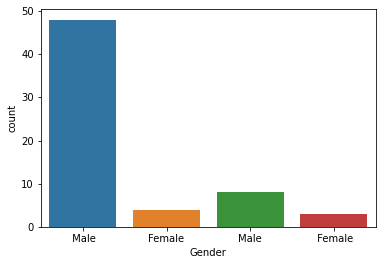

In [6]:
sns.countplot(dataframe['Gender'])

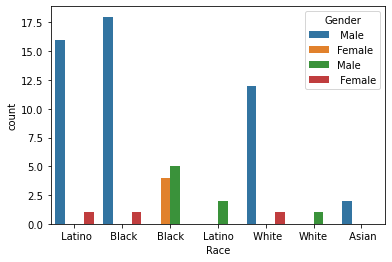

In [7]:
sns.countplot(dataframe['Race'],hue=dataframe['Gender'])

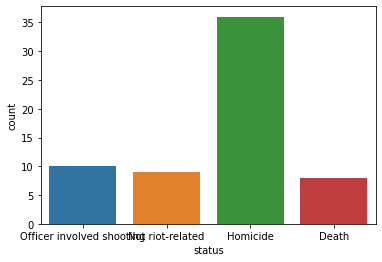

In [8]:
sns.countplot(dataframe['status'])

In [9]:
dataframe['status'].value_counts()

Homicide                     36
Officer involved shooting    10
Not riot-related              9
Death                         8
Name: status, dtype: int64

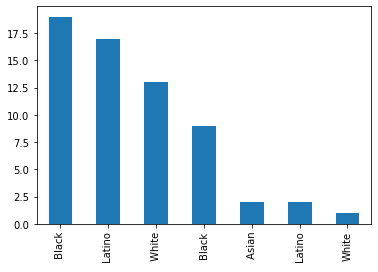

In [10]:
dataframe['Race'].value_counts().plot(kind='bar')

In [11]:
longitude = dataframe['lat'].values
latitude = dataframe['lon'].values

In [12]:
m = folium.Map(location=[34.0593, -118.274])

In [13]:
for i in range(63):
    if (i!= 51):
        folium.Marker([latitude[i],longitude[i]],popup = dataframe.loc[i,'Full Name'] ).add_to(m)
m

In [14]:
values = {'lat': 34.0593 , 'lon': -118.274} 
filedata = dataframe.fillna(value=values)

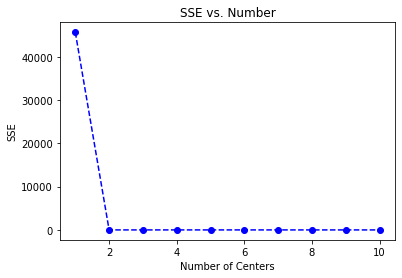

In [15]:
def get_kmeans_score(data, center):
  
    kmeans = KMeans(n_clusters=center)
    model = kmeans.fit(data)
    score = np.abs(model.score(data))
    
    return score

scores = []
centers = list(range(1,11))

for center in centers:
    scores.append(get_kmeans_score(filedata.loc[: ,['lon','lat']], center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('Number of Centers');
plt.ylabel('SSE');
plt.title('SSE vs. Number');

In [16]:
kmeans = KMeans(n_clusters=2)

kmeans.fit(filedata.loc[: ,['lon','lat']]).cluster_centers_

array([[  34.02756075, -118.28079299],
       [-118.274     ,   34.0593    ]])

In [17]:
folium.Marker([34.02756075,-118.28079299],popup = 'Cluster Center', icon=folium.Icon(color='red') ).add_to(m)
folium.Marker([34.0593,-118.274],popup = 'Cluster Center', icon=folium.Icon(color='red') ).add_to(m)

m